In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
df = pd.read_csv("/kaggle/input/youtube-new/CAvideos.csv")
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [3]:
# Drop unnecessary columns
df.drop(['video_id','category_id','publish_time','thumbnail_link','description'],inplace=True,axis=1)

# Statistical Summary

In [4]:
df.shape

(40881, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   tags                    40881 non-null  object
 4   views                   40881 non-null  int64 
 5   likes                   40881 non-null  int64 
 6   dislikes                40881 non-null  int64 
 7   comment_count           40881 non-null  int64 
 8   comments_disabled       40881 non-null  bool  
 9   ratings_disabled        40881 non-null  bool  
 10  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(4), object(4)
memory usage: 2.6+ MB


In [6]:
df.describe()

,views,likes,dislikes,comment_count
count,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


### Unique values in each column

In [7]:
columns = list(df.columns)
print("Unique Values\n")
for col in columns:
    value = df[col].nunique()
    print(f"{col} = {value}")

Unique Values

trending_date = 205
title = 24573
channel_title = 5076
tags = 20157
views = 40170
likes = 24676
dislikes = 6241
comment_count = 11172
comments_disabled = 2
ratings_disabled = 2
video_error_or_removed = 2


# Data Cleaning

In [8]:
df[["trending_year", "trending_date", "trending_month"]] = df["trending_date"].str.split(".", expand = True)

In [9]:
df.drop(df[df['video_error_or_removed'] == True].index,inplace=True,axis=0)

In [10]:
df.drop(['video_error_or_removed'],inplace=True,axis=1)

In [11]:
df.duplicated().sum()

0

In [12]:
df.head(5)

,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_year,trending_month
0,14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,17,11
1,14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,17,11
2,14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,17,11
3,14,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,17,11
4,14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,17,11


### Null Values in each column

In [13]:
columns = list(df.columns)
print("Null Values\n")
for col in columns:
    value = df[col].isna().sum()
    print(f"{col} = {value}")

Null Values

trending_date = 0
title = 0
channel_title = 0
tags = 0
views = 0
likes = 0
dislikes = 0
comment_count = 0
comments_disabled = 0
ratings_disabled = 0
trending_year = 0
trending_month = 0


There are no null values in the dataset

# Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


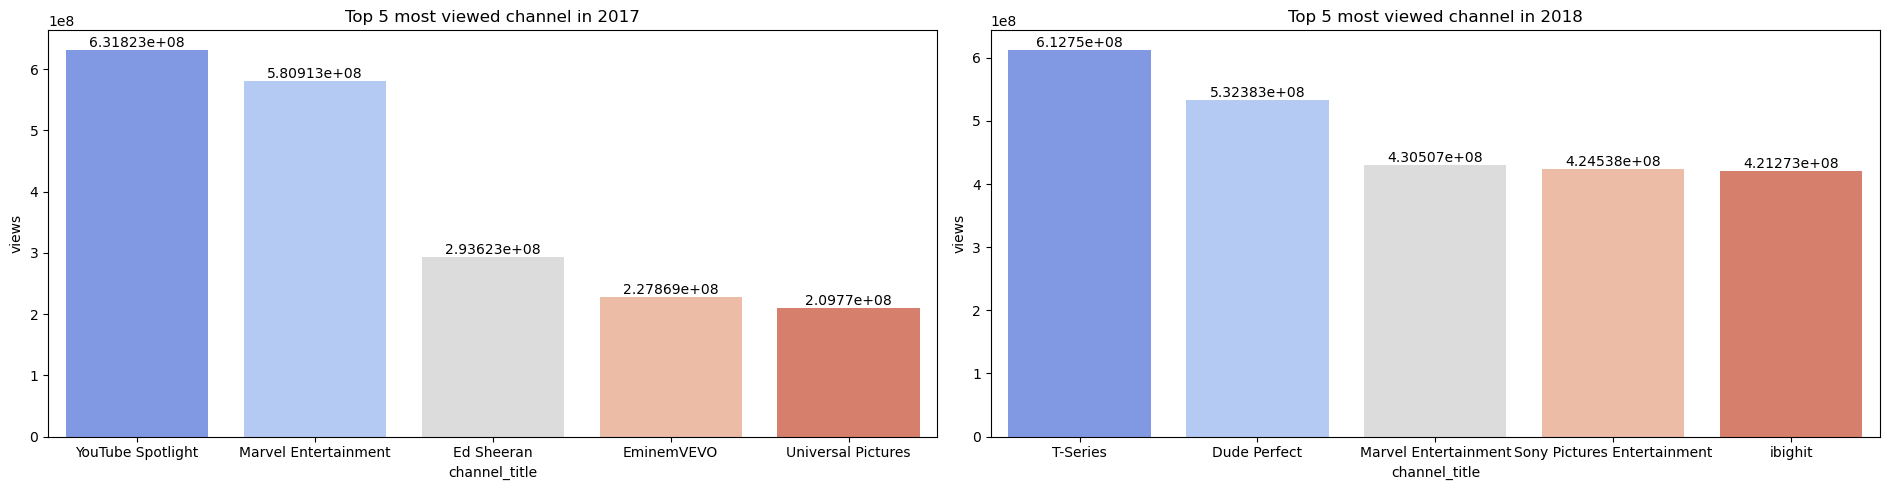

In [15]:
# Create a figure and set the size
plt.figure(figsize=(19, 5))

# Subplot 1: Top 5 most viewed channel in 2017
plt.subplot(1, 2, 1)
data_2017 = df[df["trending_year"] == "17"]
data_2017 = data_2017.groupby('channel_title').agg({'views': "sum"}).sort_values(by='views', ascending=False).reset_index().head(5)
a_2017 = sns.barplot(data=data_2017, x='channel_title', y="views", palette='coolwarm')
plt.bar_label(a_2017.containers[0])
plt.title("Top 5 most viewed channel in 2017")

# Subplot 2: Top 5 most viewed channel in 2018
plt.subplot(1, 2, 2)
data_2018 = df[df["trending_year"] == "18"]
data_2018 = data_2018.groupby('channel_title').agg({'views': "sum"}).sort_values(by='views', ascending=False).reset_index().head(5)
a_2018 = sns.barplot(data=data_2018, x='channel_title', y="views", palette='coolwarm')
plt.bar_label(a_2018.containers[0])
plt.title("Top 5 most viewed channel in 2018")

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the subplots
plt.show()


The above plot shows top 5 most viewed channels in 2017 and 2018

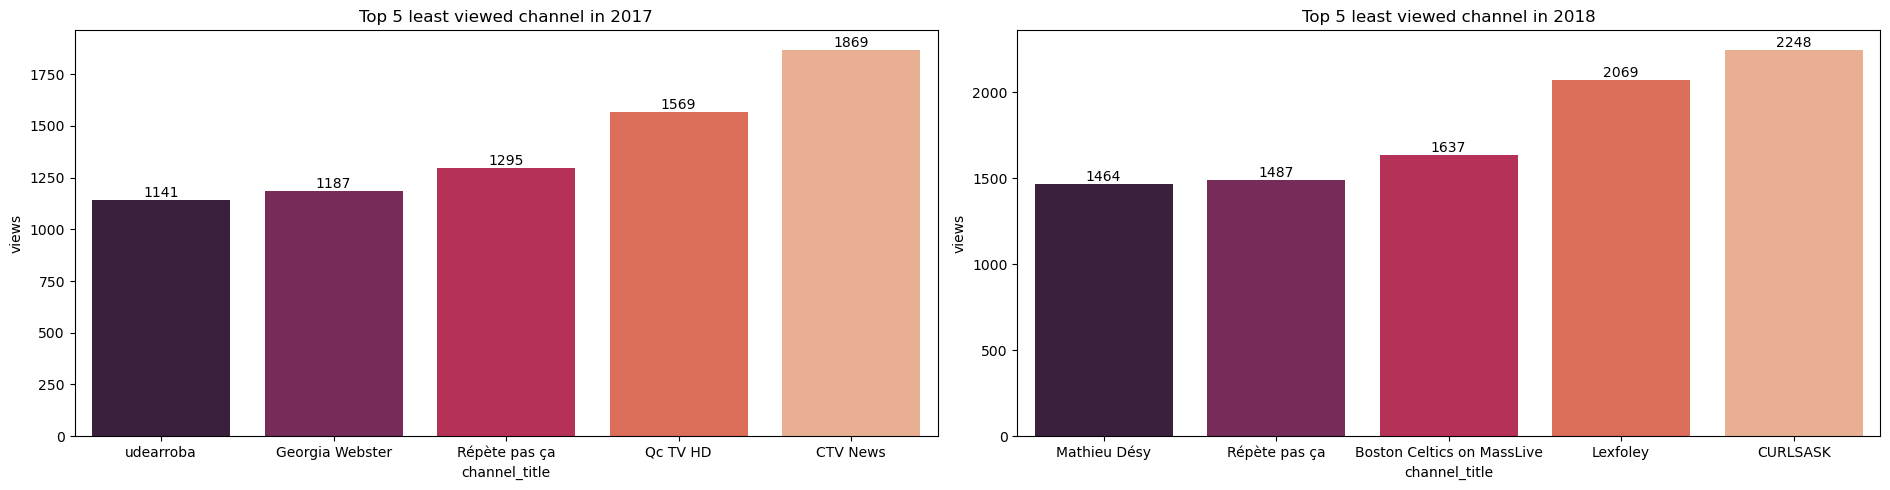

In [16]:
# Create a figure and set the size
plt.figure(figsize=(19, 5))

# Subplot 1: Top 5 most viewed channel in 2017
plt.subplot(1, 2, 1)
data_2017 = df[df["trending_year"] == "17"]
data_2017 = data_2017.groupby('channel_title').agg({'views': "sum"}).sort_values(by='views', ascending=True).reset_index().head(5)
a_2017 = sns.barplot(data=data_2017, x='channel_title', y="views", palette='rocket')
plt.bar_label(a_2017.containers[0])
plt.title("Top 5 least viewed channel in 2017")

# Subplot 2: Top 5 most viewed channel in 2018
plt.subplot(1, 2, 2)
data_2018 = df[df["trending_year"] == "18"]
data_2018 = data_2018.groupby('channel_title').agg({'views': "sum"}).sort_values(by='views', ascending=True).reset_index().head(5)
a_2018 = sns.barplot(data=data_2018, x='channel_title', y="views", palette='rocket')
plt.bar_label(a_2018.containers[0])
plt.title("Top 5 least viewed channel in 2018")

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the subplots
plt.show()


The above graph shows top 5 least viewed channels in 2017 and 2018

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


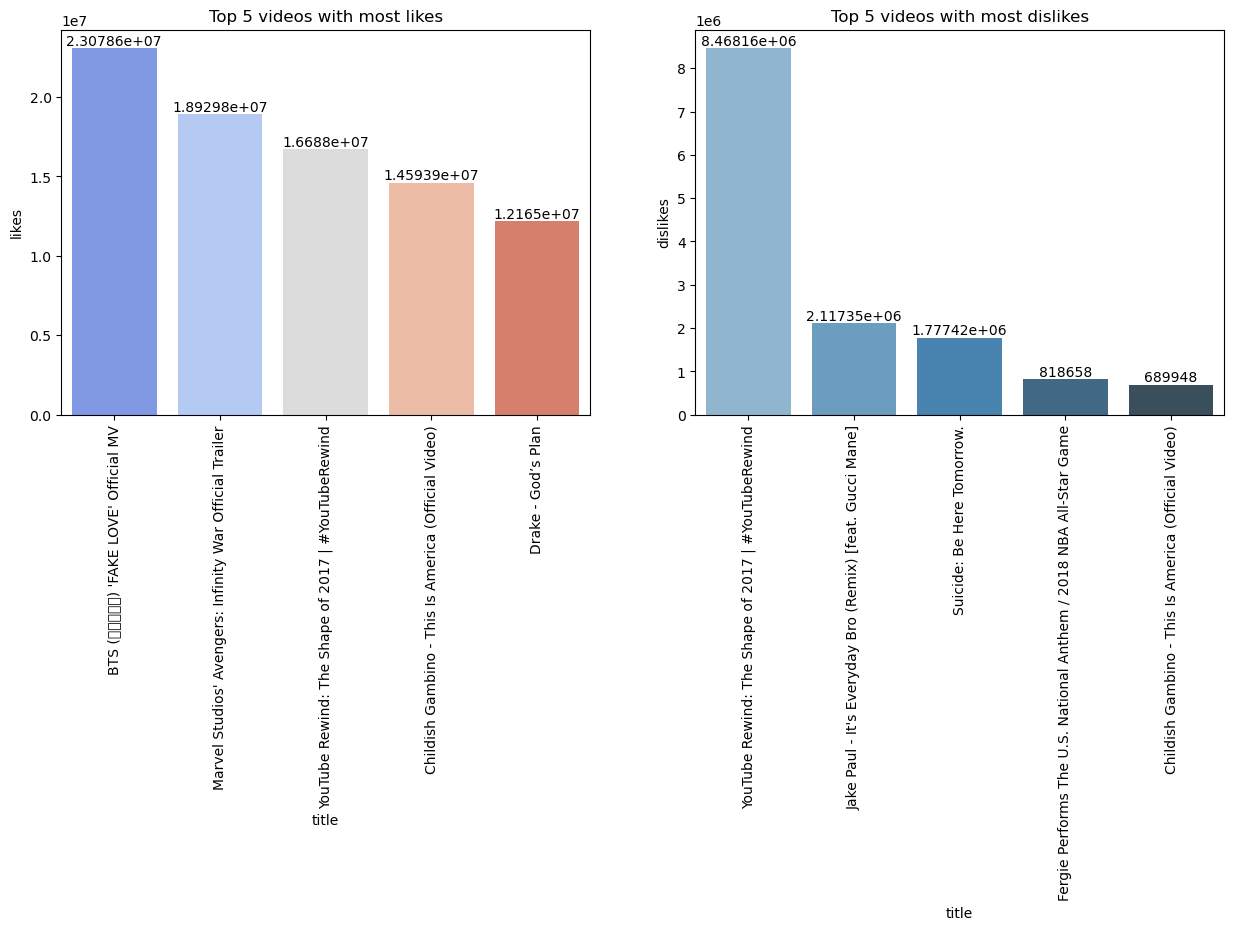

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
data = df.groupby('title').agg({'likes':"sum"}).sort_values(by='likes',ascending=False).reset_index().head(5)
a = sns.barplot(data=data,x='title',y="likes",palette='coolwarm')
plt.xticks(rotation=90)
plt.bar_label(a.containers[0])
plt.title("Top 5 videos with most likes")

plt.subplot(1,2,2)
data = df.groupby('title').agg({'dislikes':"sum"}).sort_values(by='dislikes',ascending=False).reset_index().head(5)
a = sns.barplot(data=data,x='title',y="dislikes",palette='Blues_d')
plt.xticks(rotation=90)
plt.bar_label(a.containers[0])
plt.title("Top 5 videos with most dislikes")
plt.show()

The above graph shows top 5 videos with most likes and most dislikes

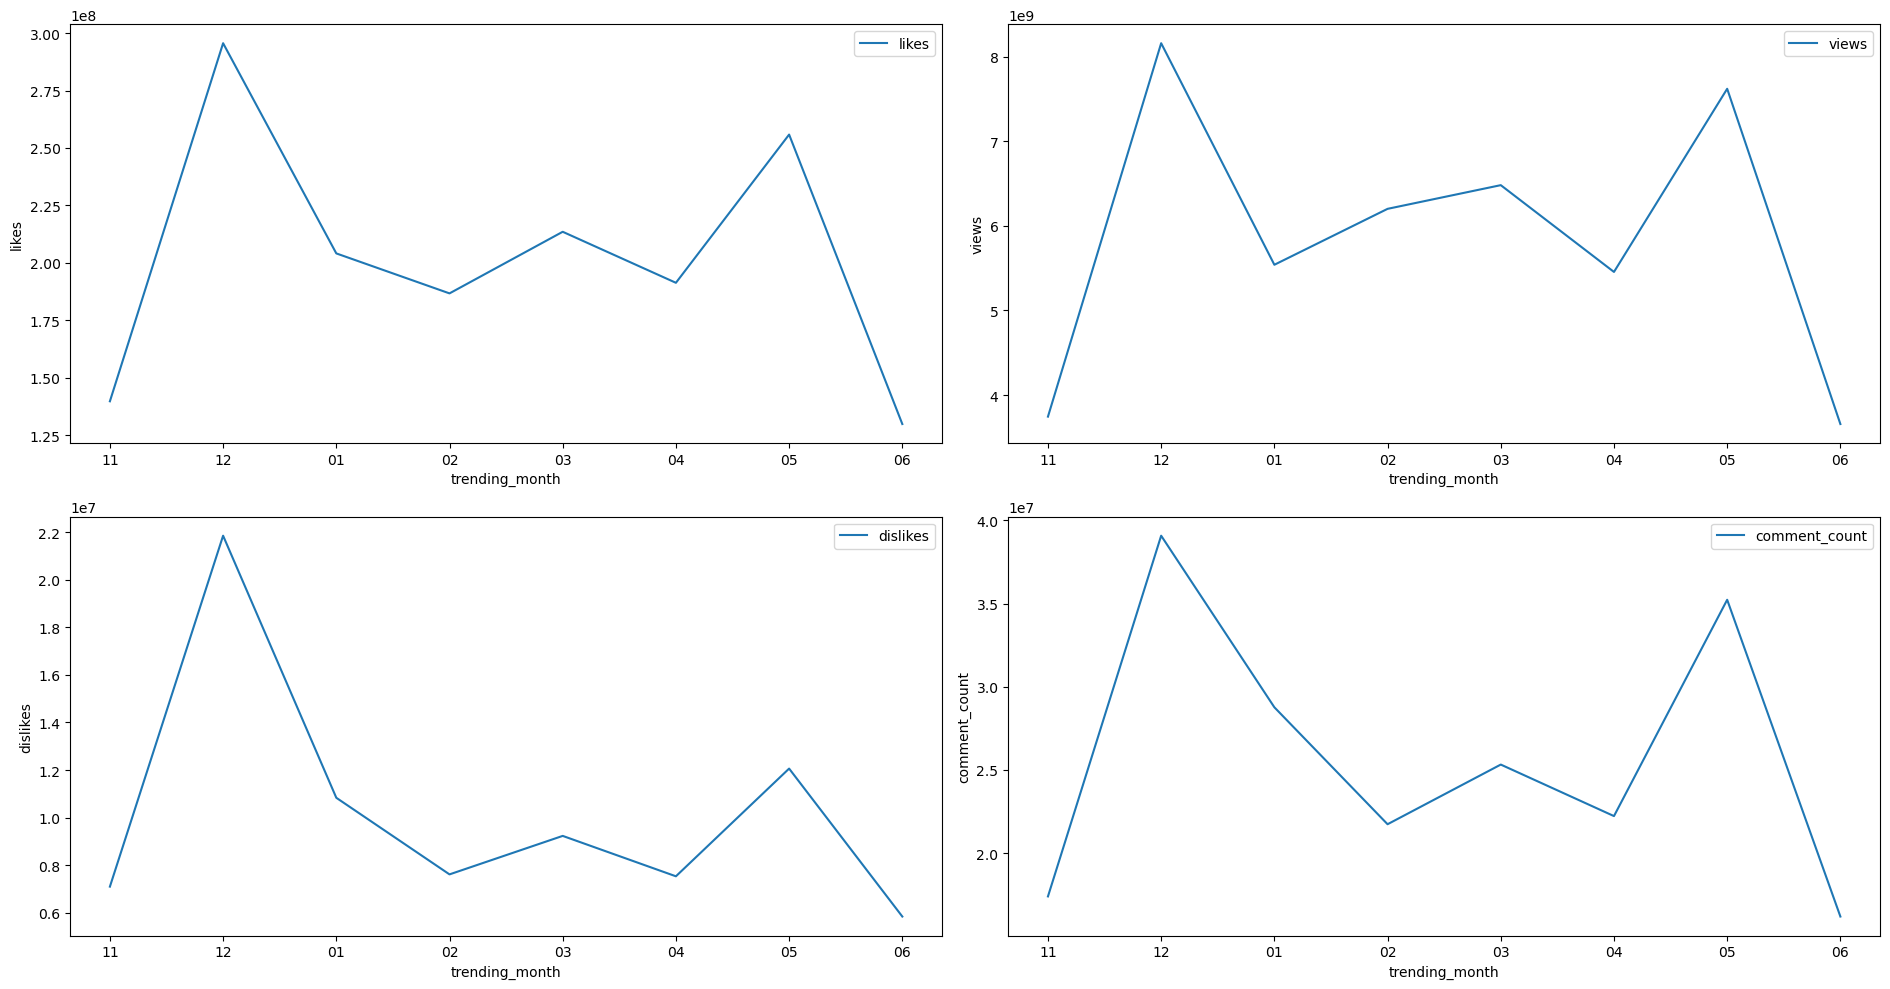

In [18]:
data = df.groupby(['trending_month',"trending_year"]).agg({'views': 'sum', 'likes': 'sum', 'dislikes': 'sum',"comment_count":"sum"}).sort_values(by="trending_year").reset_index()

plt.figure(figsize=(19, 10))
plt.subplot(2, 2, 1)
sns.lineplot(data=data, x='trending_month', y='likes', label='likes')

plt.subplot(2, 2, 2)
sns.lineplot(data=data, x='trending_month', y='views', label='views')

plt.subplot(2, 2, 3)
sns.lineplot(data=data, x='trending_month', y='dislikes', label='dislikes')

plt.subplot(2, 2, 4)
sns.lineplot(data=data, x='trending_month', y='comment_count', label='comment_count')

plt.tight_layout()

# Show the subplots
plt.show()

December 2017 was the most trending month in the available dataset, because most of the population was active on youtube to watch, like, dislike and comment on the videos

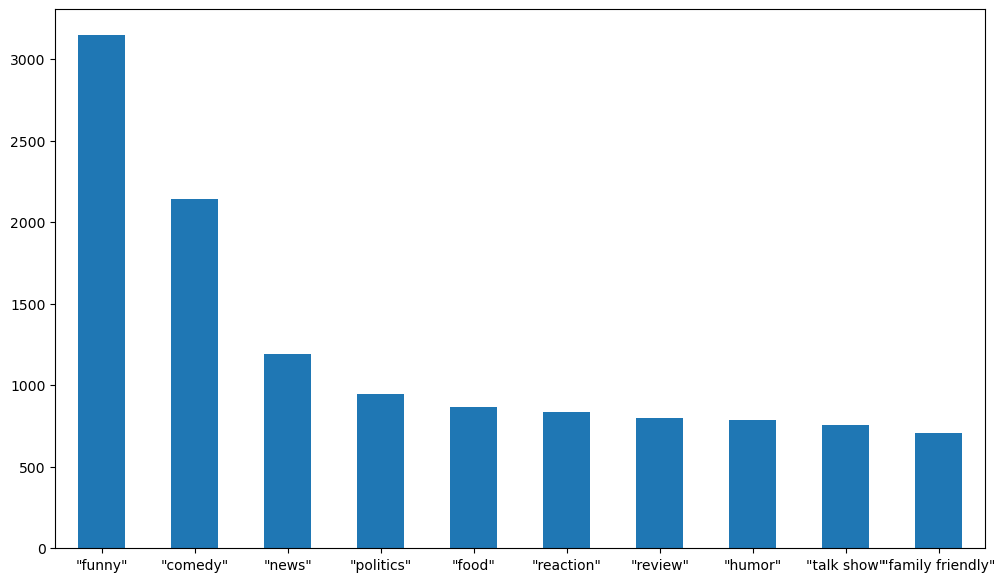

In [19]:
split_tags = df.assign(tags=df.tags.str.split("|"))
split_tags = split_tags.explode("tags")

# Combine conditions using the OR operator (|)
split_tags.drop(split_tags[(split_tags['tags'] == "[none]") | 
                           (split_tags['tags'] == "\"2018\"") | 
                           (split_tags['tags'] == "\"video\"")].index, inplace=True)

plot_tags = split_tags['tags'].value_counts().head(10)
list_tags = list(plot_tags.index)

plt.figure(figsize=(12,7))
plot_tags.plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

The above plot represents top 10 most trending taglines

In [20]:
# Popular channels based on top 10 taglies
popular_channels = pd.DataFrame()
for channel in list_tags:
    channels = split_tags[split_tags['tags'] == channel]
    popular_channels_in_yt = channels.groupby("channel_title")['likes'].sum().sort_values(ascending=False).head(5)
    popular_channel_list = list(popular_channels_in_yt.index)
    popular_channels[f'{channel}'] = popular_channel_list
popular_channels

,"""funny""","""comedy""","""news""","""politics""","""food""","""reaction""","""review""","""humor""","""talk show""","""family friendly"""
0,David Dobrik,Logan Paul Vlogs,Philip DeFranco,Philip DeFranco,First We Feast,FBE,FBE,The Late Late Show with James Corden,The Late Show with Stephen Colbert,Dude Perfect
1,The Late Late Show with James Corden,BB Ki Vines,PewDiePie,StevenCrowder,BuzzFeedVideo,REACT,CinemaSins,CollegeHumor,Jimmy Kimmel Live,Collins Key
2,How Ridiculous,Jimmy Kimmel Live,Complex,MSNBC,Collins Key,Reaction Time,PewDiePie,The Late Show with Stephen Colbert,Late Night with Seth Meyers,Lucas and Marcus
3,Bad Lip Reading,CollegeHumor,StevenCrowder,Jimmy Kimmel Live,JunsKitchen,MoreWolfie,Unbox Therapy,Late Night with Seth Meyers,Dude Perfect,Team Edge
4,Jimmy Kimmel Live,IISuperwomanII,Skip and Shannon: UNDISPUTED,Comedy Central UK,Bon Appétit,DALLMYD,Dude Perfect,J. Cole,Comedy Central UK,Reaction Time


The above table shows top 

In [21]:
# Popular videos based on top 10 taglies
popular_videos = pd.DataFrame()
for tag in list_tags:
    video = split_tags[split_tags['tags'] == tag]
    popular_videos_in_yt = video.groupby("title")['likes'].sum().sort_values(ascending=False).head(5)
    popular_video_list = list(popular_videos_in_yt.index)
    popular_videos[f'{tag}'] = popular_video_list
popular_videos

,"""funny""","""comedy""","""news""","""politics""","""food""","""reaction""","""review""","""humor""","""talk show""","""family friendly"""
0,we broke up,Logan Paul - SANTA DISS TRACK (Official Music ...,LOGAN PAUL RETURNS 📰 PEW NEWS📰,We Eat Like Donald Trump For A Day,PANCAKE ART CHALLENGE 4!!! Learn How To Make M...,WolfieRaps - Check the Statistics Feat. Ricegu...,Best of 2017 | Dude Perfect,J. Cole - Kevin's Heart,Mean Tweets – Avengers Edition,Real Life Trick Shots 2 | Dude Perfect
1,PANCAKE ART CHALLENGE 4!!! Learn How To Make M...,LOGAN PAUL - WHY 2017 WAS THE BEST YEAR OF MY ...,"We Need To Talk About The Logan Paul Problem, ...","Why Women Shouldn’t Wear Yoga Pants, Jennifer ...",Logic Solves a Rubik's Cube While Eating Spicy...,Found Assault Rifle Underwater in River While ...,Is it 𝓘𝓼𝓸𝓹𝓸𝓭 𝓗𝓸𝓾𝓻 yet?,Spill Your Guts or Fill Your Guts w/ Kim Karda...,Wheel Unfortunate | Dude Perfect,PANCAKE ART CHALLENGE 4!!! Learn How To Make M...
2,Incredibles 2 Official Teaser Trailer,J. Cole - Kevin's Heart,Eminem Goes Sneaker Shopping With Complex,Why People Are Freaking Out About Donald Trump...,$3 Fries Vs. $100 Fries,REAL VS. FAKE ANIME CHALLENGE (feat. PewDiePie),DON'T Buy The iPhone X,Shawn Mendes Carpool Karaoke -- #LateLateShawn,"Jimmy Kimmel on School Shooting in Parkland, F...",Boomerang Trick Shots | Dude Perfect
3,BOWLING BALL Vs. TRAMPOLINE from 45m!,BB Ki Vines- | Likhe Jo Khat Tujhe |,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Massive Backlash After Video Reveals The Truth...,How I Trained My Cats,COLLEGE KIDS REACT TO THIS IS AMERICA - CHILDI...,MARVEL INFINITY WARS DISINTEGRATION MEME MAKES...,ROYAL WEDDING — A Bad Lip Reading,Jimmy Kimmel Returns with Baby Billy After Hea...,Water Bottle Flip 2 | Dude Perfect
4,My Horibal Speling,THRIFTING BRANDS!! GOODWILL WITH GREATLIZA.,Why A Controversial Change Has The Internet An...,We Need To Talk About The Nazi Pug Guilty Verd...,$2 Bacon Vs. $100 Bacon,DRAGUER UNE FILLE DEVANT SON COPAIN -PART 2 (I...,MEME REVIEW: Stolen Bike Meme,Spill Your Guts or Fill Your Guts w/ Gordon Ra...,Mean Tweets – Jimmy Kimmel Edition,Football vs Soccer Trick Shots | Dude Perfect


## Analysis based on different countries

In [22]:
India = df = pd.read_csv("/kaggle/input/youtube-new/INvideos.csv")
Great_B = pd.read_csv("/kaggle/input/youtube-new/GBvideos.csv")
Germany = pd.read_csv("/kaggle/input/youtube-new/DEvideos.csv")
France = pd.read_csv("/kaggle/input/youtube-new/FRvideos.csv")
US = pd.read_csv("/kaggle/input/youtube-new/USvideos.csv")
Canada = pd.read_csv("/kaggle/input/youtube-new/CAvideos.csv")

In [23]:
country_list = [India,Great_B,Germany,France,US,Canada]
def data_cleaning():
    for country in country_list:
        country[["trending_year", "trending_date", "trending_month"]] = country["trending_date"].str.split(".", expand = True)
        country.drop(country[country['video_error_or_removed'] == True].index,inplace=True,axis=0)
        country.drop(['video_error_or_removed'],inplace=True,axis=1)
data_cleaning()

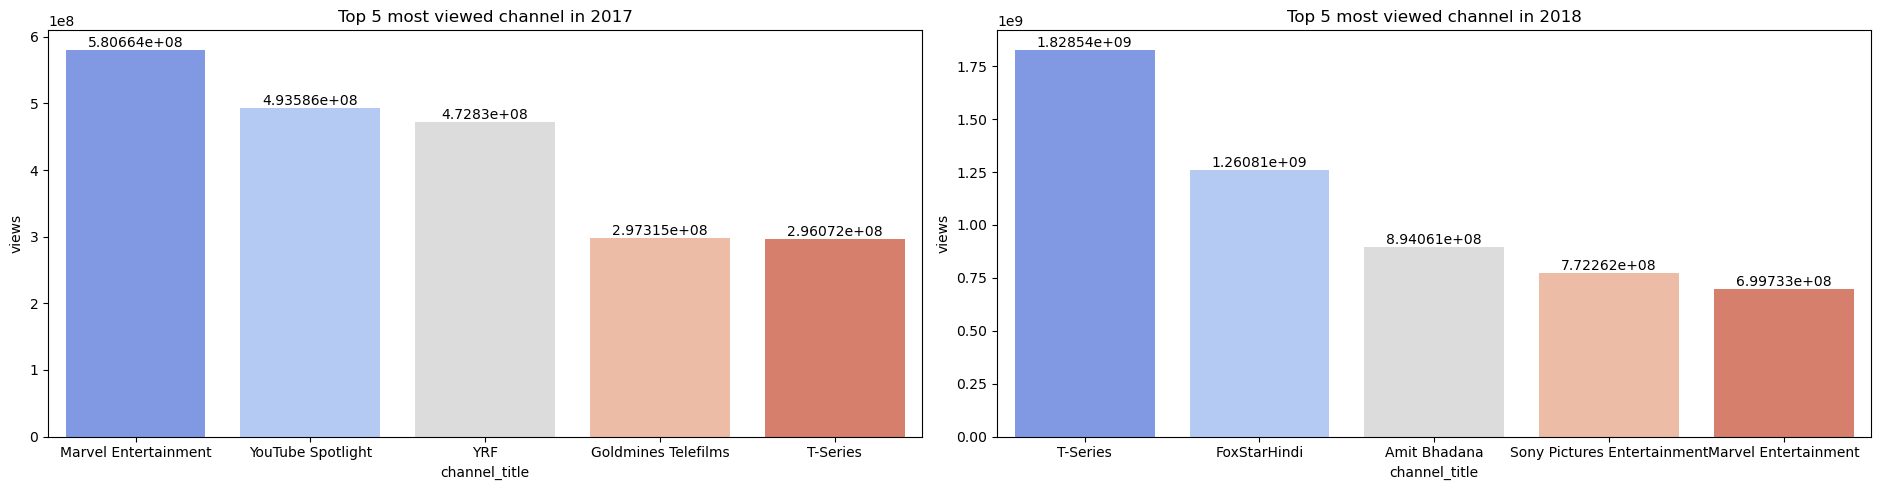

In [24]:
def most_viewed_channel(country):
    # Create a figure and set the size
    plt.figure(figsize=(19, 5))
    
    # Subplot 1: Top 5 most viewed channel in 2017
    plt.subplot(1, 2, 1)
    data_2017 = df[df["trending_year"] == "17"]
    data_2017 = data_2017.groupby('channel_title').agg({'views': "sum"}).sort_values(by='views', ascending=False).reset_index().head(5)
    a_2017 = sns.barplot(data=data_2017, x='channel_title', y="views", palette='coolwarm')
    plt.bar_label(a_2017.containers[0])
    plt.title("Top 5 most viewed channel in 2017")

    # Subplot 2: Top 5 most viewed channel in 2018
    plt.subplot(1, 2, 2)
    data_2018 = df[df["trending_year"] == "18"]
    data_2018 = data_2018.groupby('channel_title').agg({'views': "sum"}).sort_values(by='views', ascending=False).reset_index().head(5)
    a_2018 = sns.barplot(data=data_2018, x='channel_title', y="views", palette='coolwarm')
    plt.bar_label(a_2018.containers[0])
    plt.title("Top 5 most viewed channel in 2018")

    # Adjust the layout and spacing of subplots
    plt.tight_layout()

    # Show the subplots
    plt.show()

    
most_viewed_channel(India)

Above code will give you the most viewed channel for a specified country

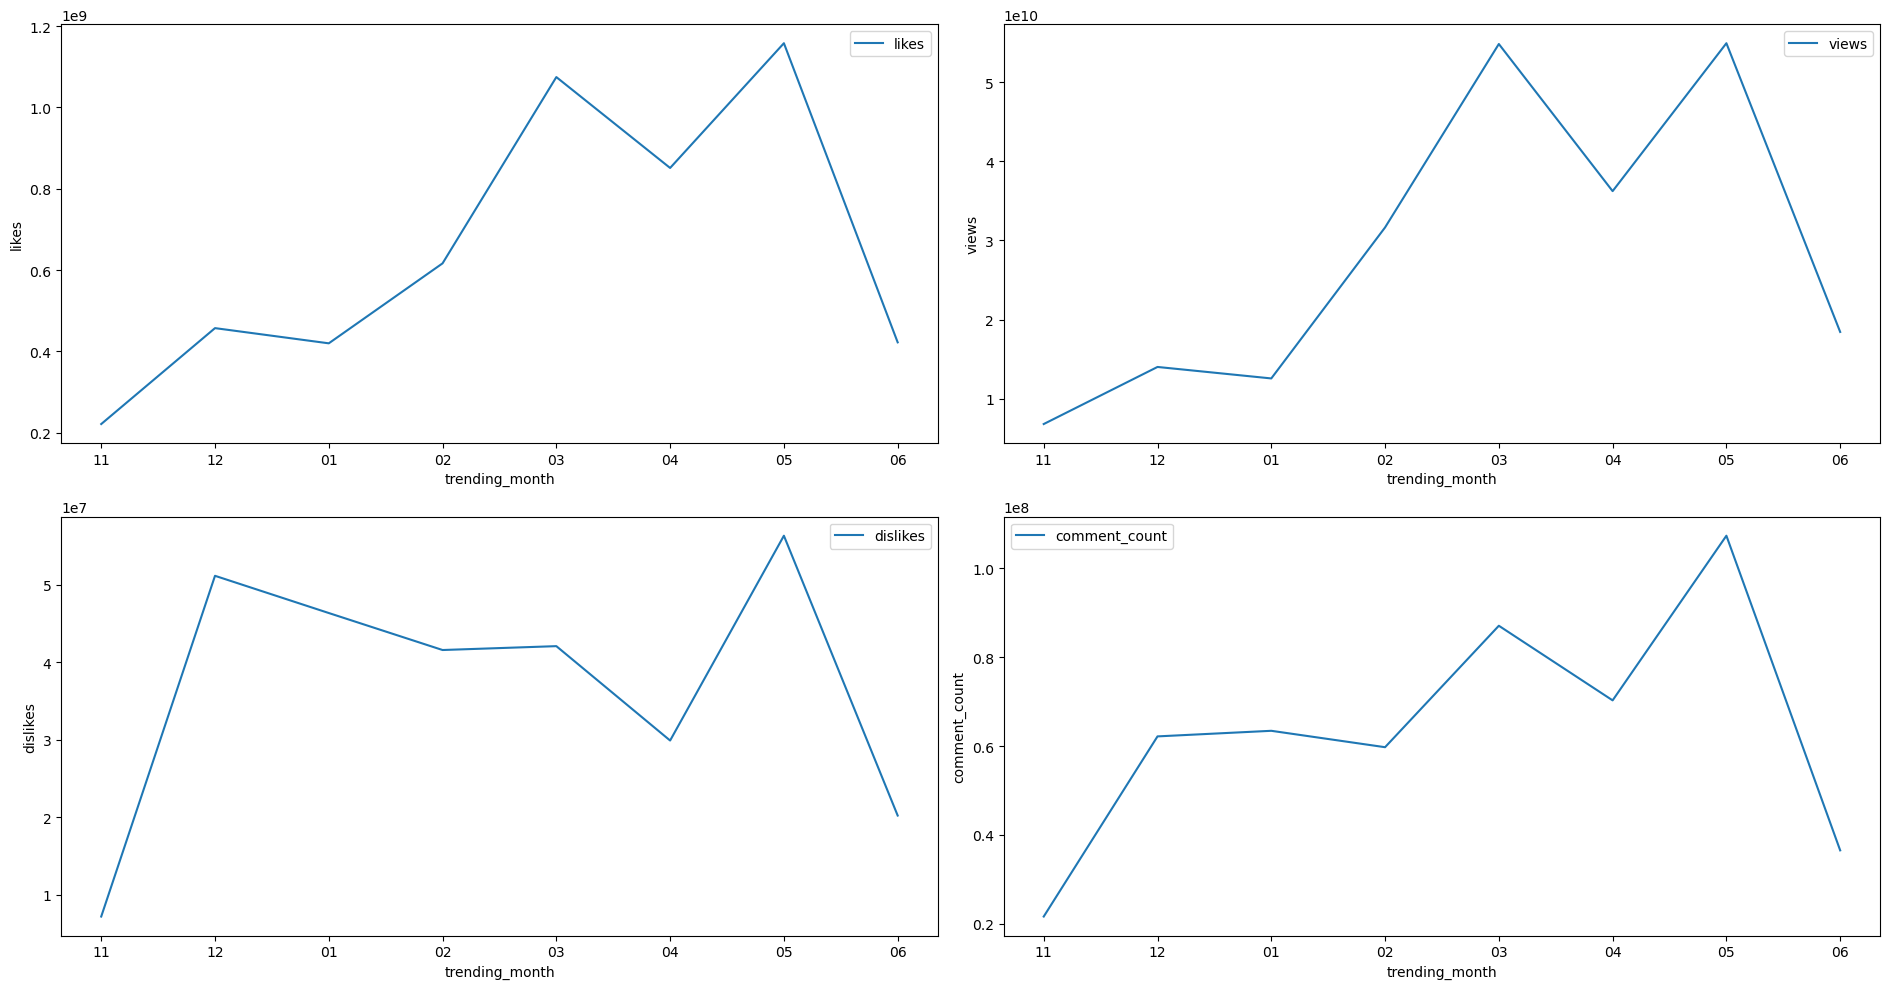

In [25]:
def trending_month(country):
    data = country.groupby(['trending_month',"trending_year"]).agg({'views': 'sum', 'likes': 'sum', 'dislikes': 'sum',"comment_count":"sum"}).sort_values(by="trending_year").reset_index()

    plt.figure(figsize=(19, 10))
    plt.subplot(2, 2, 1)
    sns.lineplot(data=data, x='trending_month', y='likes', label='likes')

    plt.subplot(2, 2, 2)
    sns.lineplot(data=data, x='trending_month', y='views', label='views')

    plt.subplot(2, 2, 3)
    sns.lineplot(data=data, x='trending_month', y='dislikes', label='dislikes')

    plt.subplot(2, 2, 4)
    sns.lineplot(data=data, x='trending_month', y='comment_count', label='comment_count')

    plt.tight_layout()

    # Show the subplots
    plt.show()

trending_month(Great_B)

Above code will show you the most trending month for a specified country

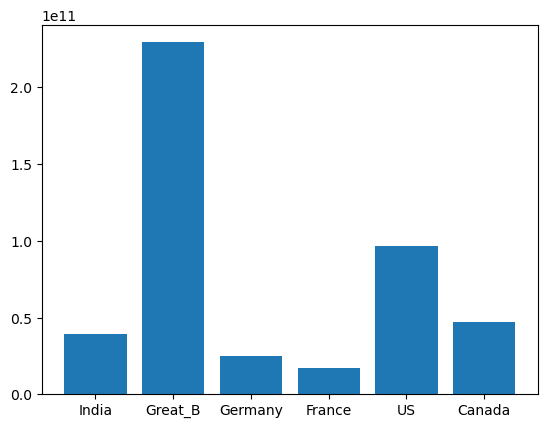

In [26]:
# comparing active audience in different countries
listt = ['India','Great_B','Germany','France','US',"Canada"]

def active_audience():
    dict = {}
    for (country,name) in zip(country_list,listt):
        total_views = country['views'].sum()
        dict[name] = total_views
    return dict
total_views = active_audience()   
names = list(total_views.keys())
values = list(total_views.values())

plt.bar(range(len(total_views)), values, tick_label=names)
plt.show()

Most of the views are from Great Britain, so we can say that people of Great Britain are more active on youtube as compared to others

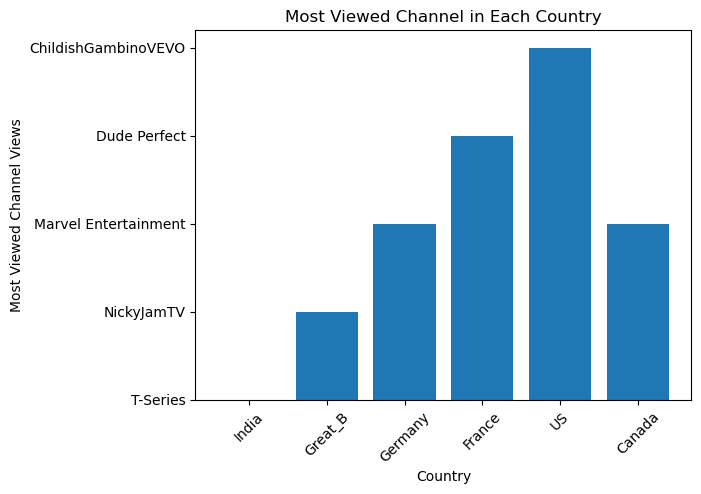

In [30]:
# Assuming your dataset is stored in a DataFrame called 'country_list'

listt = ['India', 'Great_B', 'Germany', 'France', 'US', 'Canada']

def famous_channel():
    result_dict = {}
    for (country_df, country_name) in zip(country_list, listt):
        famous_channel = country_df.groupby('channel_title')['views'].sum().idxmax()
        result_dict[country_name] = famous_channel
    return result_dict

total_views = famous_channel()

names = list(total_views.keys())
values = list(total_views.values())

plt.bar(names, values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Most Viewed Channel Views')
plt.title('Most Viewed Channel in Each Country')
plt.show()

Most viewed channel in:

India: T-Series

Great_B: NickyJam TV

Germany: Marvel Entertainment

France: Dude Perfect

US: ChildishGambinoVEVO

Canada: Marvel Entertainment
